In [2]:
# this stops warnings from being presented
import warnings
warnings.filterwarnings("ignore")

# applications give you access to pre-trained neural networks in keras, like VGG models
from keras import models, layers, applications

In [3]:
vgg19 = applications.VGG19()
vgg19.summary()

574717952/574710816 [==============================] - 60s 0us/step


In [5]:
# we want to get rid of the softmax layer, and the last 2 dense layers, so we're just working with flattened outputs
vgg19.layers.pop()
vgg19.layers.pop()
vgg19.layers.pop()

# we want to do the flattening ourself, so we take off the "top" layer of the model
vgg19 = applications.VGG19(include_top=False)
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
# let's feed an image into our network and flatten it
# create a random image:
import numpy as np
image = np.random.random((224,224,3)) # 1 sample of an image that's 224x244, and 3 RGB

# use our trained model to predict using the image
latent_vec = vgg19.predict(image.reshape((1,224,224,3)))
print(latent_vec)

[[1.89661630e-04 1.32132752e-03 6.42623287e-04 1.54278835e-03
  2.22094008e-03 1.93562265e-03 7.91524909e-03 1.78263668e-04
  2.68583797e-04 2.24667121e-04 6.56317687e-04 2.96421640e-04
  3.99160490e-04 8.63900292e-04 3.58965510e-04 3.42033105e-04
  7.22614524e-04 4.00540914e-04 7.34494708e-04 1.12384581e-03
  1.46738940e-03 9.26511828e-04 6.80849713e-04 5.47940610e-04
  1.40943899e-04 2.60359957e-04 1.13310548e-03 1.12201716e-03
  2.89604068e-04 4.68804408e-03 3.74488096e-04 4.42566699e-04
  4.43766679e-04 1.46737439e-03 9.50169866e-04 5.22787799e-04
  1.28442165e-03 4.08056803e-04 2.54785782e-03 2.89501622e-04
  7.78948248e-04 6.90655084e-04 1.06413011e-03 5.69570519e-04
  8.90879193e-04 1.96142937e-03 9.68384615e-04 7.17405230e-04
  5.14931104e-04 5.36324398e-04 9.06195259e-04 3.18260951e-04
  2.68844375e-03 2.77356897e-03 8.53669422e-04 3.24022869e-04
  1.53496396e-03 2.28091973e-04 1.09025287e-02 3.95860319e-04
  1.35134300e-03 1.06925971e-03 1.02465716e-03 9.08490794e-04
  2.6531

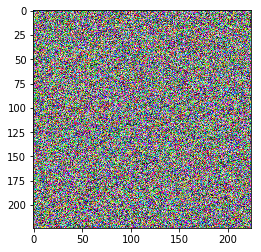

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(image,cmap='gray')
plt.show()
plt.close()

## Using Glob to collect files from a directory

In [21]:
# this is a nice way to print which directory we're in at the moment
!pwd

/Users/garethjones/Documents/Data Science/Data Science Retreat/14. Representation Learning - Tristan


In [22]:
# this is a nice way that you can find files on your laptop
import glob2 as glob
# go up one directory, and then search for all images in the training folder
# ** says search all sub-folders
# * says search all .jpg files
training_pics_path = "../06. Zero & Low Shot Learning - Nour/Exercises/Small CNN Classifier/data/train/**/*.jpg"
# this finds all directory paths and stores them in a list you can then access
paths = glob.glob(training_pics_path)
print(len(paths))
print("\n".join(paths))

2000
../06. Zero & Low Shot Learning - Nour/Exercises/Small CNN Classifier/data/train/dogs/dog.775.jpg
../06. Zero & Low Shot Learning - Nour/Exercises/Small CNN Classifier/data/train/dogs/dog.761.jpg
../06. Zero & Low Shot Learning - Nour/Exercises/Small CNN Classifier/data/train/dogs/dog.991.jpg
../06. Zero & Low Shot Learning - Nour/Exercises/Small CNN Classifier/data/train/dogs/dog.749.jpg
../06. Zero & Low Shot Learning - Nour/Exercises/Small CNN Classifier/data/train/dogs/dog.985.jpg
../06. Zero & Low Shot Learning - Nour/Exercises/Small CNN Classifier/data/train/dogs/dog.952.jpg
../06. Zero & Low Shot Learning - Nour/Exercises/Small CNN Classifier/data/train/dogs/dog.946.jpg
../06. Zero & Low Shot Learning - Nour/Exercises/Small CNN Classifier/data/train/dogs/dog.211.jpg
../06. Zero & Low Shot Learning - Nour/Exercises/Small CNN Classifier/data/train/dogs/dog.577.jpg
../06. Zero & Low Shot Learning - Nour/Exercises/Small CNN Classifier/data/train/dogs/dog.563.jpg
../06. Zero & L

In [47]:
# randomly choose a path
path = np.random.choice(paths)
print(path)

# PIL = Python Image Library
from PIL import Image
pic = Image.open(path)
pic = np.array(pic)
print(type(pic), pic.shape)

../06. Zero & Low Shot Learning - Nour/Exercises/Small CNN Classifier/data/train/dogs/dog.38.jpg
<class 'numpy.ndarray'> (374, 499, 3)


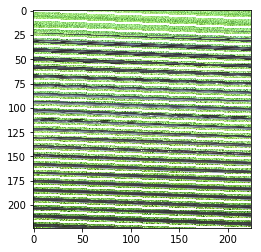

In [41]:
# we need to resize this image to be 224,224,3 so we can input to VGG
# we can see from this, that this is a numpy resize, and not an image resize. It won't work
pic = np.resize(pic,(224,224,3))
plt.imshow(pic)
plt.show()
plt.close()

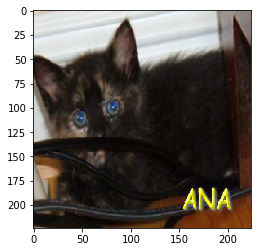

In [64]:
path = np.random.choice(paths)
pic = Image.open(path)
pic = pic.resize((224,224))
pic = np.array(pic)
plt.imshow(pic)
plt.show()
plt.close()

In [65]:
# now we have a resized image, we can predict using our VGG
latent_vec = vgg19.predict(pic.reshape(1,224,224,3))
print(latent_vec)

[[4.07135531e-06 4.04957536e-05 1.13574555e-04 5.18060697e-05
  2.85681235e-05 9.80632540e-05 1.16671708e-05 1.23080363e-05
  1.16118799e-05 2.93159496e-06 1.15780097e-07 9.26804944e-07
  7.42505699e-06 5.75461627e-06 8.55543567e-06 2.17075885e-05
  7.76022425e-05 2.14369083e-03 3.18536368e-05 1.51579106e-05
  2.38309053e-06 3.72493730e-07 6.07945083e-07 2.81577832e-06
  3.44223713e-06 4.60213215e-07 9.00666237e-07 1.17235622e-07
  1.17971638e-06 1.28796955e-05 6.75566355e-07 1.44711606e-07
  9.86748461e-08 3.39238966e-07 9.51746927e-07 5.90163438e-07
  1.52879511e-06 7.92219055e-07 2.86393998e-07 2.50966968e-06
  4.51119331e-06 2.65402406e-07 2.04428815e-07 1.61691310e-06
  1.45662341e-06 3.71441587e-07 3.39287044e-06 3.78759887e-06
  8.87525431e-08 1.04470848e-06 1.50300912e-06 1.05657979e-04
  8.01476403e-07 5.65558764e-07 7.83784287e-07 9.07147864e-07
  4.42370037e-07 1.38703101e-07 2.95158020e-06 1.65026040e-06
  2.14708075e-06 3.75579781e-08 2.25729437e-07 2.24074924e-07
  2.8161

In [69]:
latent_vec = vgg19.predict(image.reshape((1,224,224,3)))
print(latent_vec.flatten().shape)

(25088,)


## Transfer Learning - Using a model without training it

In [ ]:
# re-import the VGG19 model
vgg19 = applications.VGG19(include_top=False,input_shape =(224,224,3))
vgg19.summary()

In [ ]:
# we can set parameters to be trainable or not, either in full, or by layer
vgg19.layers[1].trainable = False
vgg.summary()

In [10]:
# when we print, we can see that trainable params goes to 0
vgg19.trainable = False
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [12]:
# we can now start adding parameteres to train
# this means we can stop training on the VGG19 model, and just keep the same weights
model = models.Sequential()
model.add(vgg19) # we can add the whole VGG19 model in one layer, and then not train it whilst training the other layers
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid')) # binary classification so we add sigmoid (faster than softmax)

# softmax makes sure all the values you get are between 0 and 1, and sums them together to get 1
print(model.inputs[0].shape)
model.summary()

(?, 224, 224, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 26,447,425
Trainable params: 6,423,041
Non-trainable params: 20,024,384
_________________________________________________________________
